![](pictures/amberd.jpg)

## Previous Workshop

In the previous workshop, Armen discussed about the Single Linear Regression.  

- How to Run it using Scikitlearn
- Check Assumption

## In this workshop

1. Talk about modeling
    - Theory
2. Modeling with 1 distribution 
    - Theory
    - Trying to pick best value
3. Introducing new Variables
4. Check Assumptions

## Modeling

Modeling is trying to make predictions based off evidence or information that you know. 


Let's try an example:

**If you were to guess someone's salary. What would you do?**

- What questions would you ask? 
- What extra information would you like to know?

$$ Y = F(?) $$

$$ Y = F(X) $$

There can be an infinite number of things that go in and play a hand in estimating a person's income or any Y for that matter, but we want to find a way to explain and predict in a simple manner. 

Unless you know the true process of what goes in, your models are just estimates and estimates that try to explain what is happening.


<p style="text-align: center;">This is why you have the famous quote by George Box below. </p>


![](pictures/models_are_wrong.jpg)



## Statistical/Machine Learning


We want to see if we can get our machine to figure out the patterns behind this process without explicitly telling it to do. 

If you think about how a human learns?

- It's through education and experience. 

- You can try to quantify your experience and lessons through datapoints in your life. 


#### Example)

**What happens when you put your hand on the stove?:** 

![](pictures/hot_stove.jpeg) 

![](pictures/dont-touch.jpeg)

You get burned.


<br>


Let's try to quantify what happened?



| Hand Burned (Y) | Hand on Stove (X) |   
|-------------|---------------|
| Yes         | Yes           |
| No          | No            |
| No            | No              |
| Yes            | Yes              |


- So you have quantified and collected your experience in the form of data. 
- What was going on in your mind was you were collecting information/observation, then you figured out what is the relationship. 
- This is kind of the basis of machine learning to get the machine to learn things

The objective here is can we get the machine to understand this relationship without us having to explicitly tell the machine that when you put your hand on the stove, you will get burned. 

The way that we learn from this experience, we can try to get the machine to learn from this data above. 


That is the basis of modeling. There are things that you can observe or control (x) that can help predict something else (Y). 


## Machine Learning 

So for machine learning there are a couple of different learning techniques. 

<br>

The two biggest ones are supervised and unsupervised learning

![](pictures/machine_learning.png)

<br>


<br>


### Supervised Learning

With supervised learning, you have your data and also past examples (data) on what you want to predict. You are telling the machine to create a model using the past data to supervise its training and adjust where it goes wrong


<br>

### Data Types

If you think about the data types you can have, you can either have numerical or categorical. 

- Numerical: representing any number
    - Example: 1,2,3,1.5, 7, 1000
    
- Categorical: Representing any category 
    - Example: Ethnicity, High/Low/Medium

So these are values that you can try to predict (outputs) or use as inputs. 

Because these 2 are two different categories, there are different models that handle the two different tasks. 

1. Regression models for numerical data
2. Classification models for categorical data


### Unsupervised Learning

We will not be jumping into this one, but for coverage, with unsupervised learning, the machine does not exactly know what to be looking for so it just tries to find patterns on its own. 




# Questions? 

![](pictures/questions.jpg)

## Modeling: Linear Regression. 


## Use Case: 
    - Y Ouput: Numeric and Continuous 
        - Continous: Can go infinitely small, technically no limit and expand to cover any range of numbers.
    - X Variables: Numeric or Categorical (Continous or Discrete)
        - Continous: Can go infinitely small, technically no limit and expand to cover any range of numbers.
        - Discrete/Categorical: When variables can only take on certain numbers or levels. 
            - You cannot divide the number 
            
### Main Technique:
    - This draws a linear line of Best Fit
    - how does it know what line to best draw?
       
### Optimization Function:
    - How do you know if something is good or bad? 
        - You boil it down to a KPI
    - Optimizing for MSE 

![](pictures/mse_formula.png)

### Equation:
$$\hat{Y} = B_0 + B_1X  + B2_X + B3_X + e$$
![](pictures/equation.jpeg)



# Building it up to MLR. 

Before we build up to more complex models its keep it simple and then improve and iterate on it. 

Let's start off with one variable and understanding distributions. 


## Distributions and Random Variable


*What is a random variable distribution?*

When you are looking at a variable (in this case, continous distributions). You see a big spectrum of values that it can take on. You assume it is randomly distributed around. certain points.

What can you tell me about the plot below.


In [1]:
# Saw you are given the task of predicting sepal length. What would you do?

import pandas as pd
from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt
iris = load_iris()
iris_data = iris['data']
iris_df = pd.DataFrame(iris_data, columns = ["sepal_length", 'sepal_width', 'petal_length', 'petal_width'])[0:50]
iris_df.head()


sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <a list of 10 Patch objects>)

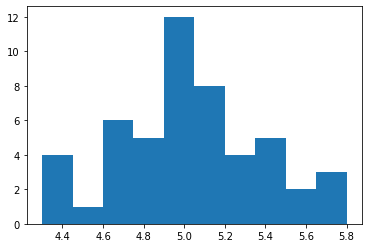

In [2]:
plt.hist(iris_df["sepal_length"])


In [3]:
# You would run summary statistics on it and get the statistics of your distribution
iris_df["sepal_length"].describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64

Now, say you see a new flower and you are asked to make a prediction about the sepal length. Not knowing anything else, if you had to choose one value what would you choose?

Which value do you see the most? Above? Which would minimize your MSE above?

In [4]:
def mean_square_error(df, y_hat):
    '''
    MSE = 1/n((y - y_hat)^2)
    '''
    y = np.array(df)
    error = y-y_hat
    squared_error = error**2
    mean_squared_error_value = np.mean(squared_error)
    return(mean_squared_error_value)
import numpy as np
y_hat_values = np.arange(4.0, 6.0, 0.1)

loss_function = []
for y_hat in y_hat_values:
    y_hat_loss = mean_square_error(iris_df["sepal_length"], y_hat)
    loss_function.append(y_hat_loss)

In [5]:
len(loss_function)

20

In [6]:
print(np.array(y_hat_values))
print(np.array(loss_function))

[4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7
 5.8 5.9]
[1.1338 0.9426 0.7714 0.6202 0.489  0.3778 0.2866 0.2154 0.1642 0.133
 0.1218 0.1306 0.1594 0.2082 0.277  0.3658 0.4746 0.6034 0.7522 0.921 ]


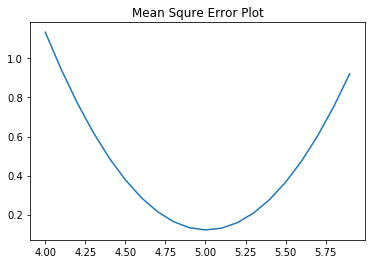

In [7]:
plt.plot(np.array(y_hat_values), np.array(loss_function))
plt.title("Mean Squre Error Plot")
plt.show()

Visually, It seems like your best prediction is about 5.0.
Let's see if you can program the computer to find it.

To better optimize there is the idea of gradient descent. 
This is where you start off at any point or value and make your way down the concave loss function above. 

You start off on a random point find the gradient that goes closer to the bottom and take a step there descenting down into that direction. 
The machine learns to change the coefficients to take a step into the direction of less error.

![](pictures/learning_rate.png)
![](pictures/derivative.png)


So your model right now is:

$$\hat{y} = 5.005$$

This is assuming you no no other information...

Your model will look like:




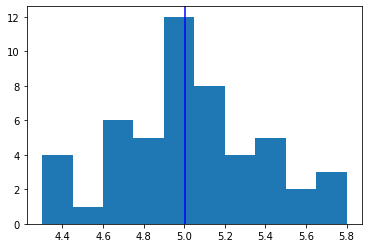

In [8]:
plt.hist(iris_df["sepal_length"])
plt.axvline(x = np.mean(iris_df["sepal_length"]), color = 'b', label = 'axvline - full height')
plt.show()

In [37]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = np.ones(len(iris_df["sepal_width"]))
y = iris_df["sepal_length"]

model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 23 May 2021   Prob (F-statistic):                nan
Time:                        12:28:39   Log-Likelihood:                -18.305
No. Observations:                  50   AIC:                             38.61
Df Residuals:                      49   BIC:                             40.52
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0060      0.050    100.422      0.000       4.906       5.106
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.362
Skew:                           0.116   Prob(JB):                        0.834
Kurtosis:                       2.654   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So you can technically right this as. 

$$\hat{y} = 5.005 + 0X_1 + 0X_2 + 0X_3$$

At this point you have used up all the information from the main variable iteself, can you incorporate other variables? let's take a look are there other variables that are linearly related?

sepal_width looks like a good candidate



### Adding an extra dimension

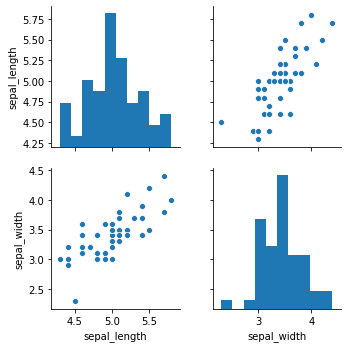

In [10]:
import seaborn as sns
sns.pairplot(iris_df.iloc[:,:2])

So now you are telling the machine okay, using the sepal width predict the sepal length and find the weights that best suit it.

$$\hat{y} = ? + ?X_1 + 0X_2 + 0X_3$$

In [11]:
from sklearn.linear_model import LinearRegression
X, y = iris_df["sepal_width"].values.reshape(-1,1), iris_df["sepal_length"].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)
# what is going on is gradient descent under the hood, it is adjusting the ? values to the 
# the values that would result in the best fit.

[2.63900125] [[0.69048972]]


In [12]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = iris_df["sepal_width"]
y = iris_df["sepal_length"]
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Sun, 23 May 2021   Prob (F-statistic):           6.71e-10
Time:                        11:44:11   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6390      0.310      8.513      0.000       2.016       3.262
sepal_width     0.6905      0.090      7.681      0.000       0.510       0.871
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   2.542
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.464
Skew:                          -0.041   Prob(JB):                        0.793
Kurtosis:                       2.535   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

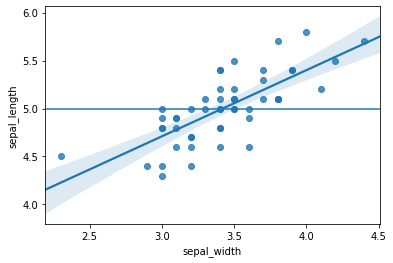

In [13]:
# Model shifted from a point to now a line in 2-D. 
# As you add more dimensions to it your model evolves from a point to a line to a plane then hyperplane
graph = sns.regplot(x="sepal_width", y="sepal_length", data=iris_df)
graph.axhline(5)
plt.show()

The model shifted from 

$$\hat{y} = 5.005 + 0X_1 + 0X_2 + 0X_3$$

to 

$$\hat{y} = 2.639 + .6905X_1 + 0X_2 + 0X_3$$


In this interpretation, now, say we want to know how changing one thing would affect us. 
If we want to know how a change in this would affect it, we can
Taking the derivative of your equation with respect ot the vairable you care about and interpret it in that regard.
Assuming all else equal, on average, one unit increase of x1 would result in B1 change in Y1


### Can we improve on it by adding additional information? 

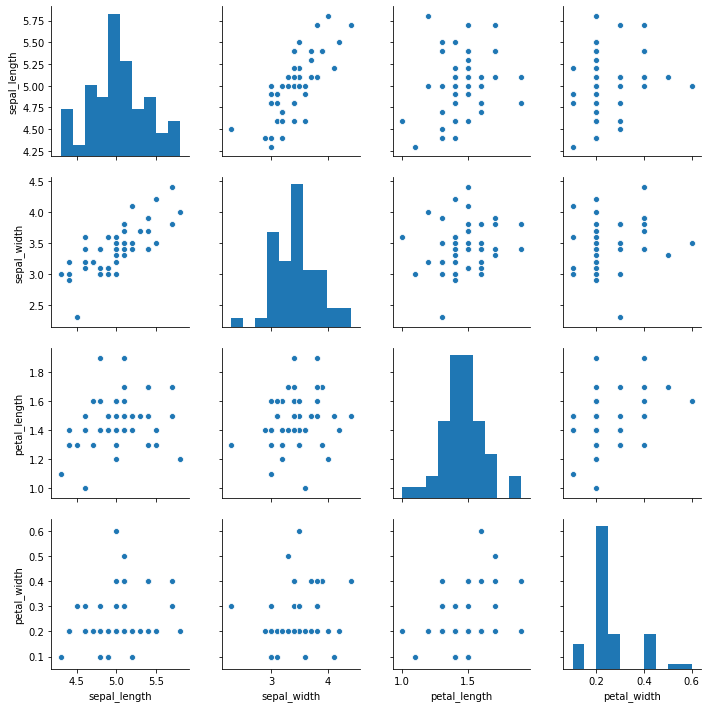

In [14]:
sns.pairplot(iris_df)

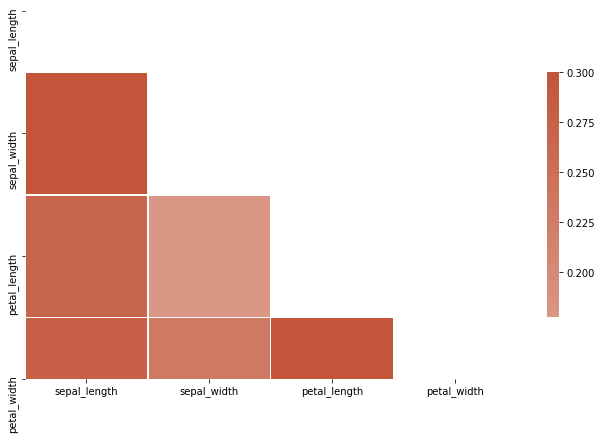

In [15]:
# Compute the correlation matrix
corr = iris_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
import plotly.express as px


df = px.data.iris().iloc[0:50]
fig = px.scatter(
    df, x='sepal_width', y='sepal_length', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [17]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = .02
margin = 0

df = px.data.iris().iloc[0:50]

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

As you add more dimensions you model incorporates more complexity and becomes a hyperplane.
Your model can get better but it can also get worse be careful. 


### MLR Assumptions 

Since linear regressions are widely used there are five basic assumption to be considered before accepting to use linear regression; as following :

1. Linearity: you are doing a linear model, this works best when your model is linear.
    - How to check: plot it and look at correlations
    - Solution: Adding nonlinear terms to the model or applying transformations

2. Indepedence: Not only with other variables (avoid multicolinearity), but with the error term as well (avoid endogeniety), and also making sure that everything is iid (avoid autocorrrelation).
    - Multicolinearity: Drop Variables, dimension reduction
    - Endogeneity: IV regression
    - Autcorrelation: Check using Durbin Watson Test

3. Normality: make sure that that the residuals are normally distributed.
- A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

4. Expected Variance (Homoscedastic): Making sure that the variance is constant throughout. 
    - Solution: Transformations or robust standard errors


If these assumptions are met, they would say the linear regression model is BLUE:
Best
Linear
Unbiased 
Estimate

And your regression results are the best they can be and pretty accurate.
Let's try to see how to check for assumptions for MLR.

### Setup for the assumptions

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline
from sklearn.linear_model import LinearRegression


# Loading in the boston dataset
boston = datasets.load_boston()

# Creating Artificial linear data using the same number of features and observations as the
#Boston housing prices dataset for assumption test comparison
linear_X, linear_y = datasets.make_regression(n_samples=boston.data.shape[0],
                                              n_features=boston.data.shape[1],
                                              noise=75, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target


# Fitting the model to boston
boston_model = LinearRegression()
boston_model.fit(boston.data, boston.target)

# Fitting the model to a linear model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

## Checking for Linearity

Since linear regression is a linear model, it is great at modeling linear relationships. The best way to check if there is a linear relationship between plotting it out using a scatter plot and correlation matrix earlier. You want to see if your predictions are linearly related.

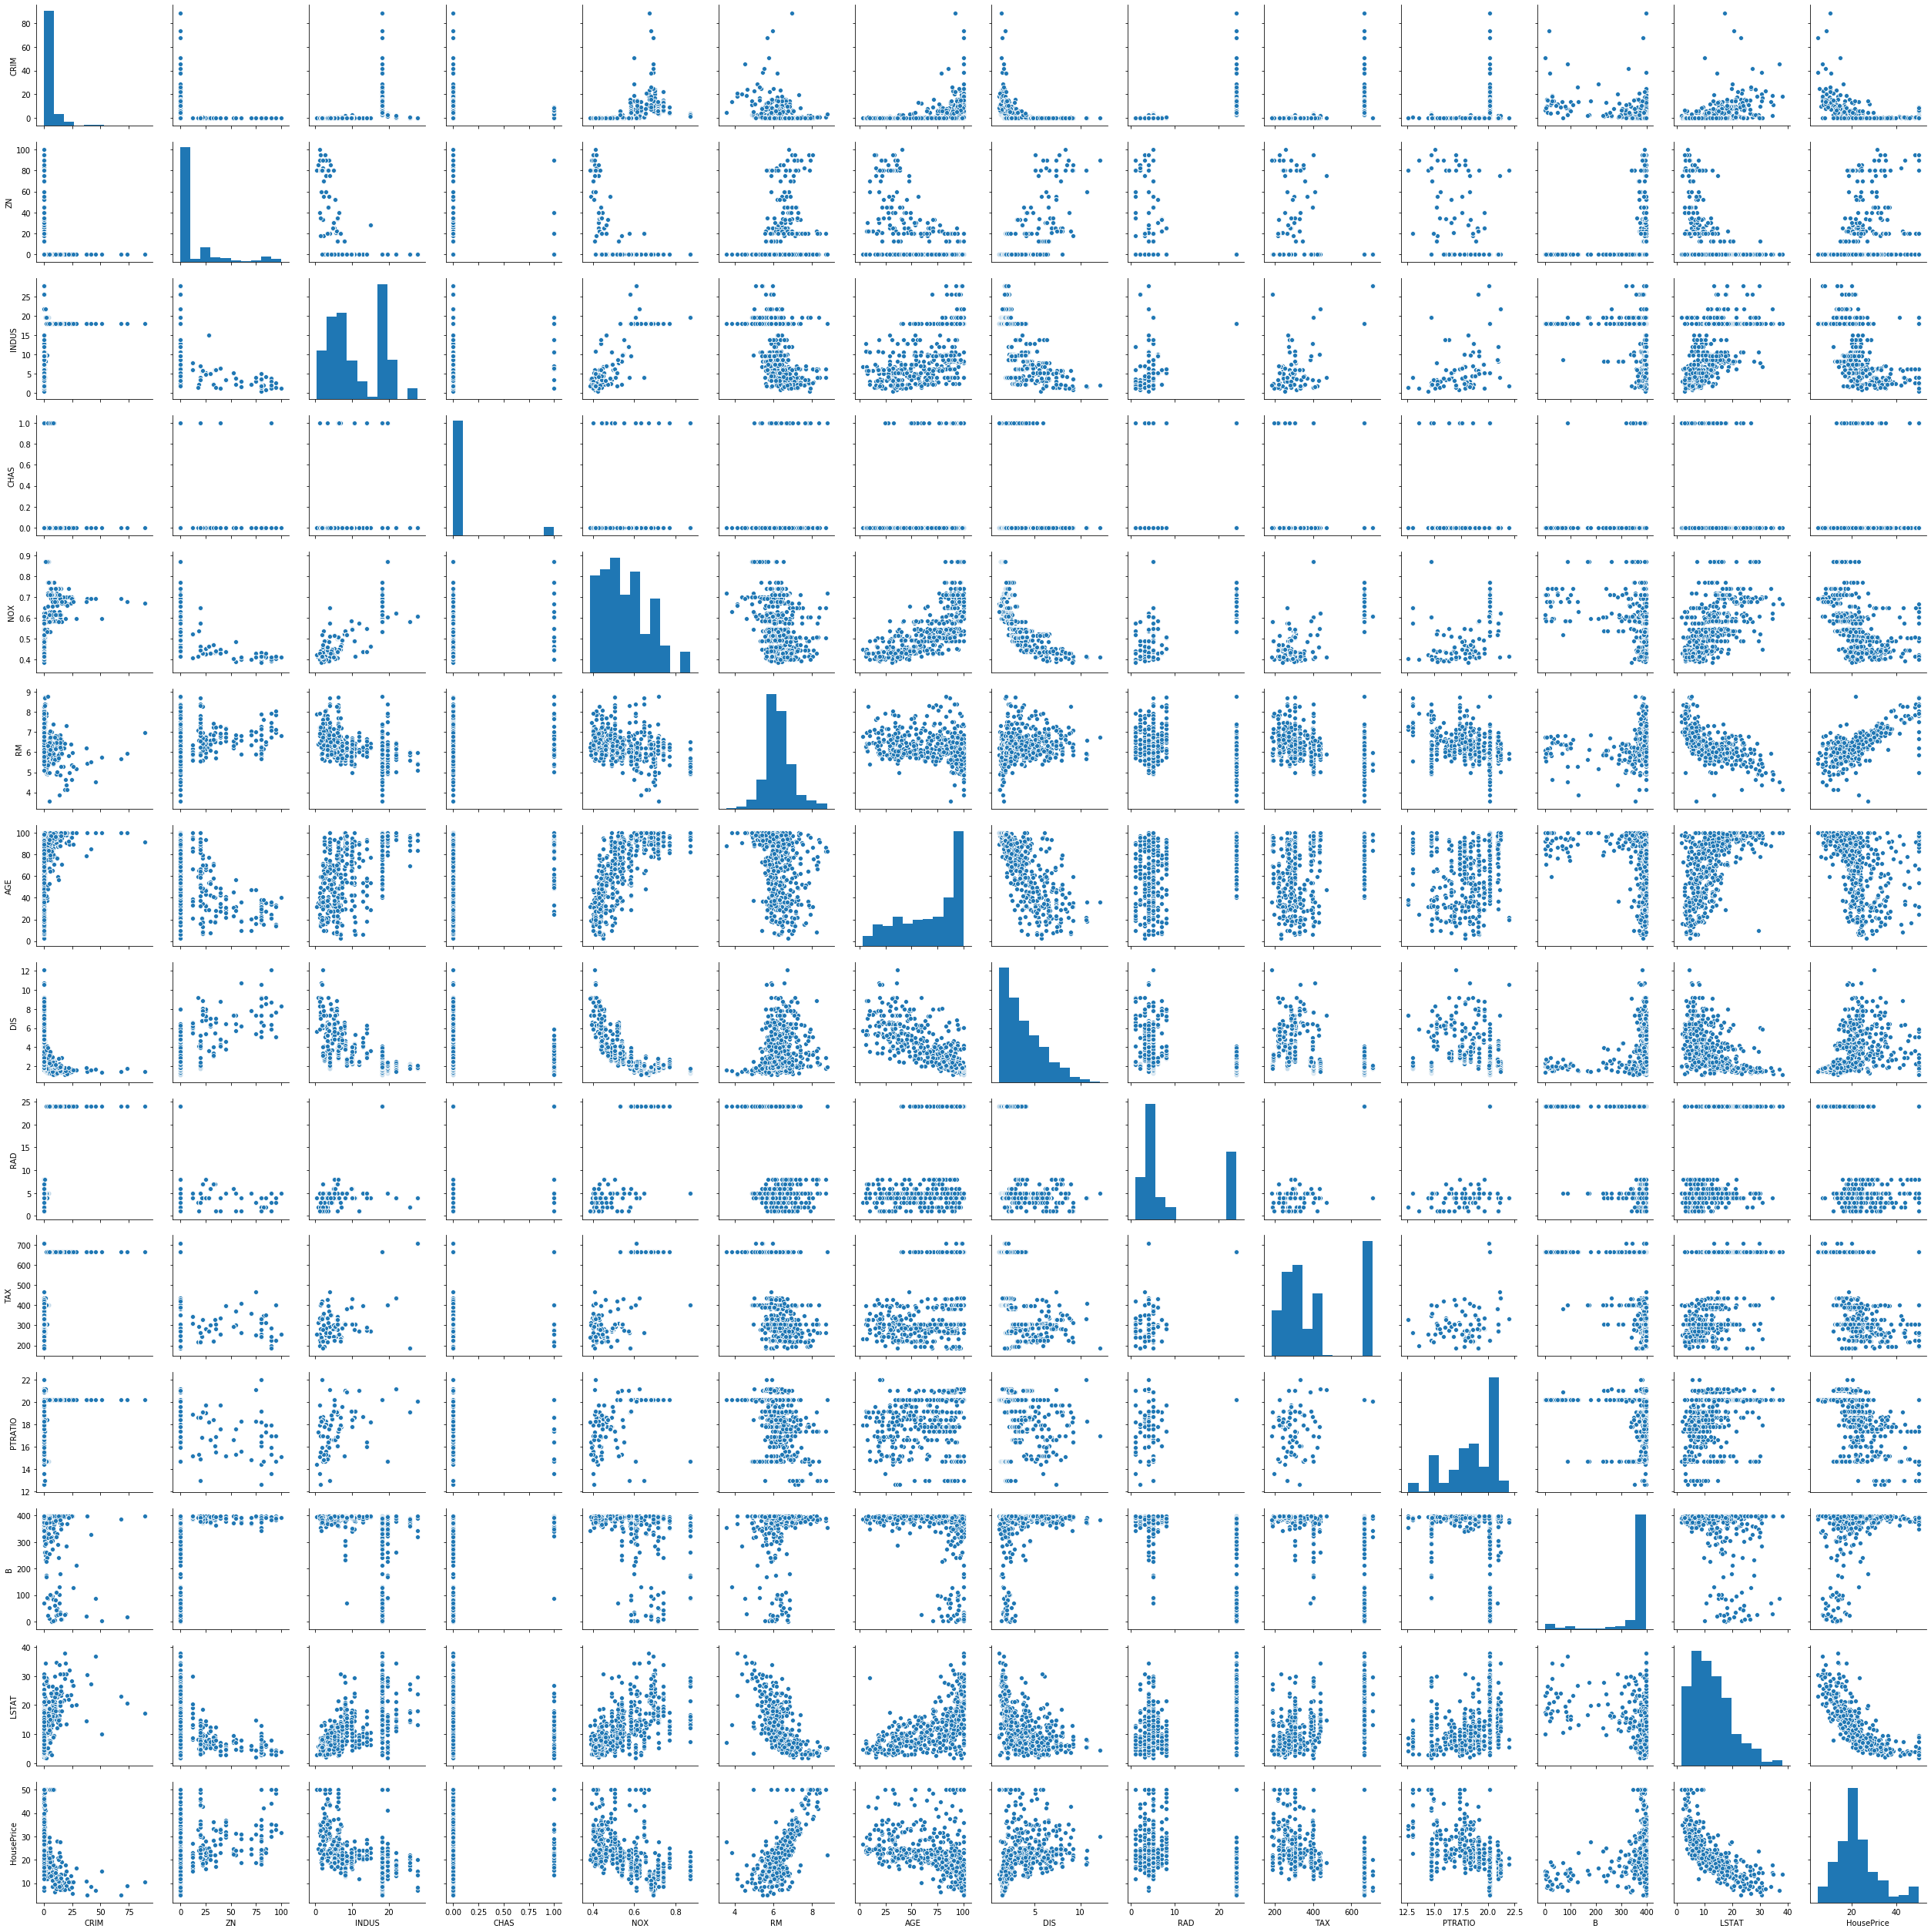

In [40]:
sns.pairplot(df)
# this might get a bit messy
# try to focus on just your predictions

### Control Model

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



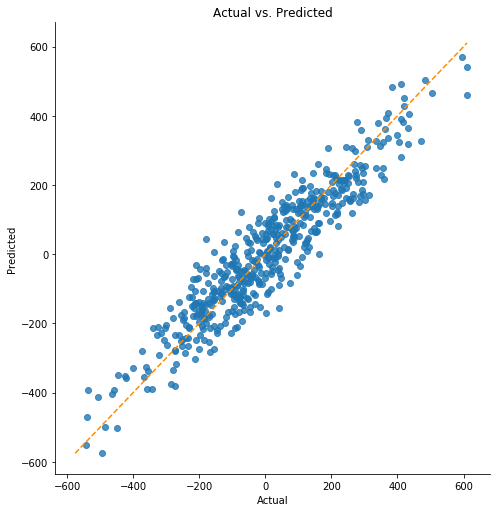

In [20]:
linear_assumption(linear_model, linear_X, linear_y)


### Boston Model

For the most part this looks pretty linear, except maybe towards the end. The end points are always the trickiest.

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



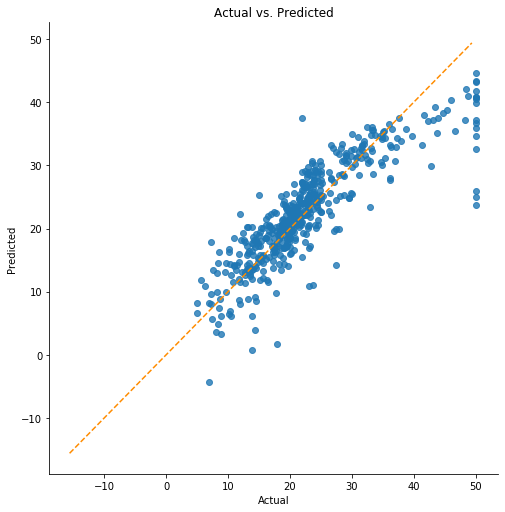

In [21]:
linear_assumption(boston_model, boston.data, boston.target)


## Independence

So ideally when you are running a regression you want to make sure that your terms are independent of each other. As your variables correlate more with each other, it's harder for the model to learn which variable to listen to more. Because its less confident, the coefficients might shift or the variance might increase resulting in values being not statistically significant.

- VIF = 1 → No correlation
- VIF = 1 to 5 → Moderate correlation
- VIF >10 → High correlation


In [22]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


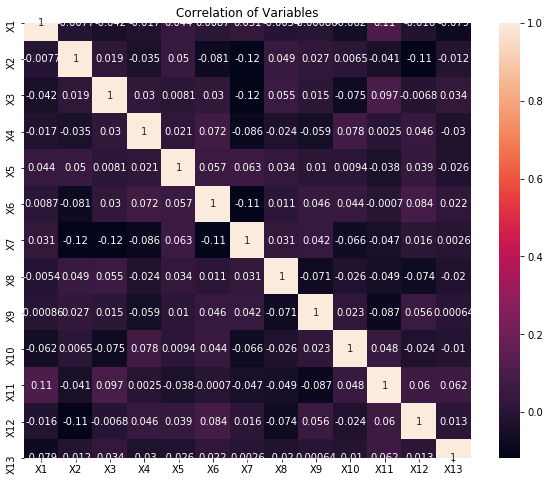

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 1.0309311702971027
X2: 1.045717680299211
X3: 1.0418076962011933
X4: 1.0269600632251448
X5: 1.0199882018822788
X6: 1.0404194675991594
X7: 1.0670847781889186
X8: 1.0229686036798158
X9: 1.0292923730360835
X10: 1.0289003332516535
X11: 1.0520432208216244
X12: 1.0336719449364802
X13: 1.0140788728975827

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [23]:
multicollinearity_assumption(linear_model, linear_X, linear_y, linear_feature_names)


Assumption 3: Little to no multicollinearity among predictors


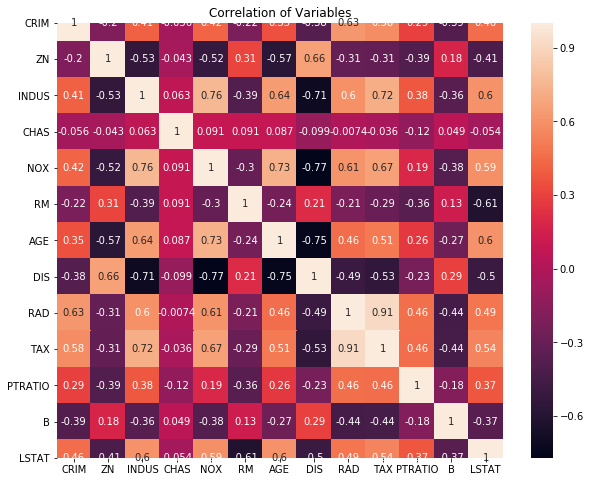

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
CRIM: 2.1003728199615224
ZN: 2.8440132669462637
INDUS: 14.485757706539331
CHAS: 1.1529518589418777
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994314
DIS: 14.699652383749175
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.104942636229136
LSTAT: 11.102024772203539

10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [24]:
multicollinearity_assumption(boston_model, boston.data, boston.target, boston.feature_names)


So compared to the toy dataset the boston dataset has a lot of multicolinearity meaning correlated variables. 
We will talk about how to deal with this in the future talks but here are some possible solutions.

Solutions:
- Drop the variables
- Run a partial regression
- User Ridge
- Run PCA

### Autocorrelation

Part of independence is you want your errors to not be correlated, this would impact the model.

Linear Regression: assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

- **Why it can happen**: In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

- **What it will affect**: This will impact our model estimates.

- **How to detect it**: We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.

- **How to fix it**: A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.



In [25]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [26]:
autocorrelation_assumption(linear_model, linear_X, linear_y)


Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.003450513845911
Little to no autocorrelation 

Assumption satisfied


In [27]:
autocorrelation_assumption(boston_model, boston.data, boston.target)


Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0715916506006853
Signs of positive autocorrelation 

Assumption not satisfied


## Normality

In [28]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

       

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.33506604584662064
Residuals are normally distributed


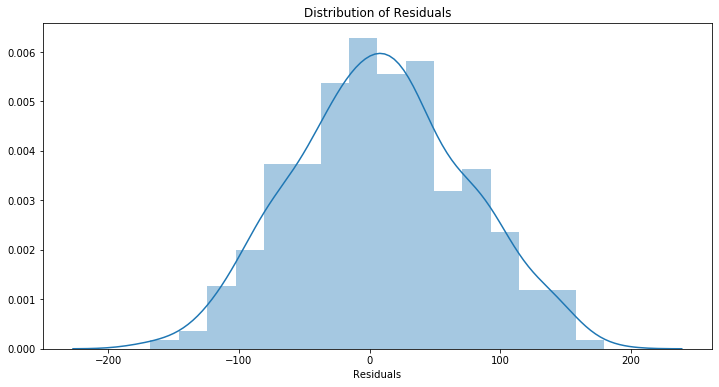


Assumption satisfied


In [29]:
normal_errors_assumption(linear_model, linear_X, linear_y)


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.311128328210816e-25
Residuals are not normally distributed


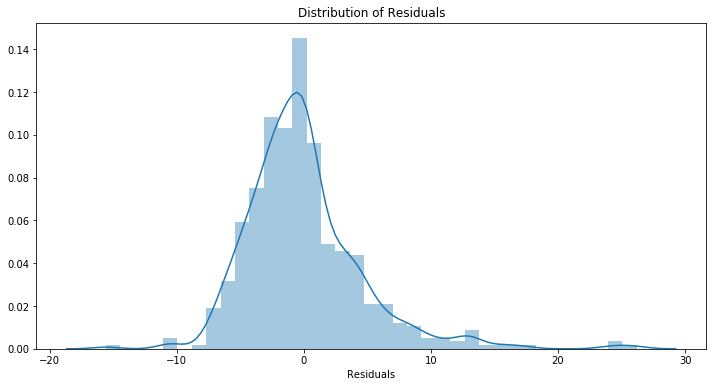


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [30]:
normal_errors_assumption(boston_model, boston.data, boston.target)


### Homoscedasticity

This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

- Why it can happen: Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

- What it will affect: Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

- How to detect it: Plot the residuals and see if the variance appears to be uniform.

- How to fix it: Heteroscedasticity (can you tell I like the scedasticity words?) can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

In [31]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


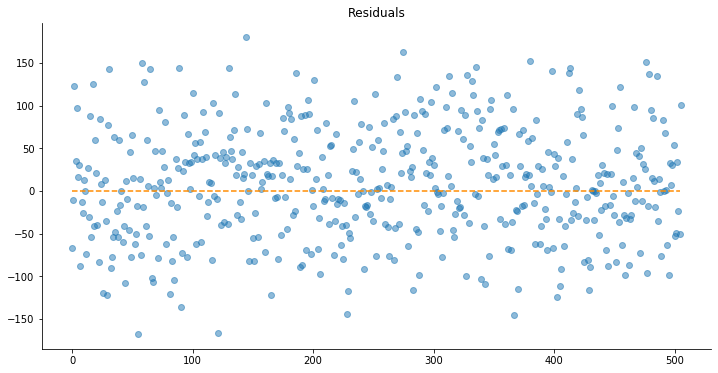

In [32]:
homoscedasticity_assumption(linear_model, linear_X, linear_y)


Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


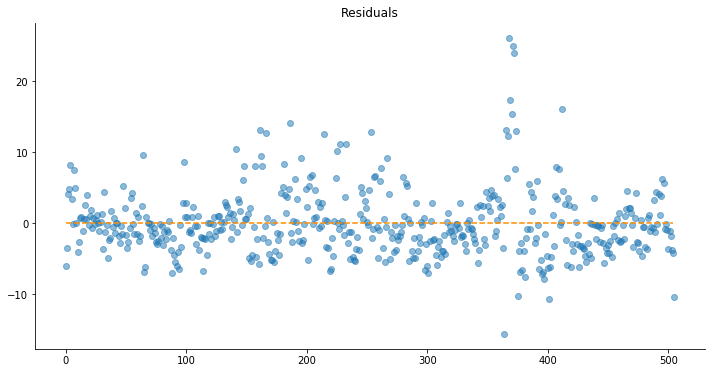

In [33]:
homoscedasticity_assumption(boston_model, boston.data, boston.target)


## Summary 

- We went over the theory of linear regression from 0 to 1 to 2 dimension to 2+. 
- Talked about gradient descent and how that is used under the hood. 
- Implemented LM through scikit learn and statsmodels
- Went over assumptions. 


Next Steps:
    - This model is actually the first building block step into more complicated models:
        - Stepwise Regression
        - Lasso and Ridge Regression
        - Logistic Regression
        - Neural Networks
        - Regression Splines
        - Poisson Regression
        - Time Series Modeling
        - Instrumental Variables
        - Panel Data



Resources and References:

- Introduction to Statistical Learning
- Elements of Statistical Learning
- Introduction to Econometrics by Wooldridge
- Khan Academy
- Ritvik Khakhar's Video (Seriously check it out)